# Prática Guiada: Maldição da Dimensionalidade.

#### Vamos iniciar nossa discussão sobre a [maldição da dimensionalidade](https://deepai.org/machine-learning-glossary-and-terms/curse-of-dimensionality#:~:text=The%20curse%20of%20dimensionality%20refers,and%20%E2%80%9Ccloseness%E2%80%9D%20of%20data.) importando as seguintes bibliotecas:

- [`pandas`](https://pandas.pydata.org/docs/), para a manipulação dos dados.
- [`seaborn`](https://seaborn.pydata.org/), para a visualização dos dados.

In [1]:
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


####  <span style = "color:red">Código Original.</span>
<!---
%pylab inline
import seaborn as sns
import pandas as pd
-->

## Proporção de outliers

#### Imagine que temos uma variável distribuída uniformemente em um hipercubo de `d` dimensões, qual seria a proporção esperada de `outliers` ? Podemos definir os outliers como aqueles pontos que recebem valores extremos em algumas das `d` dimensões. 

#### Vamos considerar, por exemplo, um cubo com `d = 2`,  o que forma um quadrado.


#### Vamos usar o método [`np.random.uniform()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) para gerar uma distribuição de pontos no intervalo `(0, 1)` com o tamanho `m`. Guardamos esses pontos gerados em uma matriz `X`.

In [2]:
m = 500

xs = uniform(0.0,1.0,m)

ys = uniform(0.0,1.0,m)

X = c_[xs,ys]

#print(xs)
#print(ys)
#print(X)

####  <span style = "color:red">Código Original.</span>
<!---
m = 500

xs = uniform(0.0,1.0,m)

ys = uniform(0.0,1.0,m)

X = c_[xs,ys]

#print(xs)
#print(ys)
#print(X)
-->

#### Depois disso vamos plotar os dados gerados com a função [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html), usando um marcador do tipo `marker = 'o'` e lembrando de definir o tamanho dos pontos com o parâmetro `ms`.

#### A idéia é preencher com pontos entre as barras cinzas, definidas pelas funcão [`fill_between()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.fill_between.html), aplicada em diferentes pontos.

#### Aqui, a quantidade `p` representa a borda de nosso sistema o intervalo dentro do qual procuramos `outliers`,  `X` e `X`  $\times 1\%$.

Outliers  18 de 500


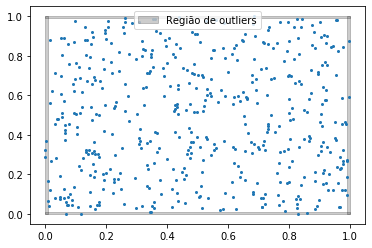

In [3]:
plot(xs, 
     ys,
     'o', 
     ms = 2
    );

x = [0.0,1.0]

p = 0.01 # 1%

fill_between(x, 
             0, 
             p, 
             alpha = 0.2, 
             color = 'k'
            )

fill_between(x, 
             1 - p, 
             1, 
             alpha = 0.2, 
             color = 'k'
            )

fill_betweenx(x, 
              0, 
              p, 
              alpha = 0.2, 
              color = 'k'
             )

fill_betweenx(x, 
              1 - p, 
              1 , 
              alpha = 0.2, 
              color = 'k', 
              label = 'Região de outliers'
             );

legend();

print('Outliers ', 
      sum([any([(d < .01 or d > .99) for d in p]) for p in X]), 
      'de', 
      m
     )

####  <span style = "color:red">Código Original.</span>
<!---
plot(xs, 
     ys,
     'o', 
     ms = 2
    );

x = [0.0,1.0]

p = 0.01 # 1%

fill_between(x, 
             0, 
             p, 
             alpha = 0.2, 
             color = 'k'
            )

fill_between(x, 
             1 - p, 
             1, 
             alpha = 0.2, 
             color = 'k'
            )

fill_betweenx(x, 
              0, 
              p, 
              alpha = 0.2, 
              color = 'k'
             )

fill_betweenx(x, 
              1 - p, 
              1 , 
              alpha = 0.2, 
              color = 'k', 
              label = 'Região de outliers'
             );

legend();

print('Outliers ', 
      sum([any([(d < .01 or d > .99) for d in p]) for p in X]), 
      'de', 
      m
     )
-->

#### Mas o que acontece à medida que aumentamos a dimensionalidade do conjunto de dados? Como não podemos fazer gráficos com mais de três dimensões, vamos gerar um gráfico da evolução da proporção de outliers para cada nível de dimensionalidade.

#### Vamos definir uma função chamável que calcule uma amostra de 1000 pontos com um número `d` de dimensões.

In [4]:
def sample_(d, N = 1000 ):
    '''Gera uma amostra de 1000 pontos em d dimensões'''
    return [[uniform(0., 1.) for i in range(d)] for _ in range(N)]

####  <span style = "color:red">Código Original.</span>
<!---
def sample_(d, N = 1000 ):
    '''Gera uma amostra de 1000 pontos em d dimensões'''
    return [[uniform(0., 1.) for i in range(d)] for _ in range(N)]
-->

#### Em seguida vamos criar uma nova função, para realizar a contagem do número médio de pontos considerados `outliers`, ou seja, pontos que estejam entre os limites de `X` e $1\%$ disso.

In [5]:
def corner_count(points):
    '''Conta a quantidade de pontos que são outliers em alguma das d dimensões.'''
    return mean([any([(d < .01 or d > .99) for d in p]) for p in points])

####  <span style = "color:red">Código Original.</span>
<!---
def corner_count(points):
    '''Conta a quantidade de pontos que são outliers em alguma das d dimensões.'''
    return mean([any([(d < .01 or d > .99) for d in p]) for p in points])
-->

#### A seguir plotamos a proporsão de `outliers` como função do aumento do número de dimensões `d`, ou atributos em nosso sistema.

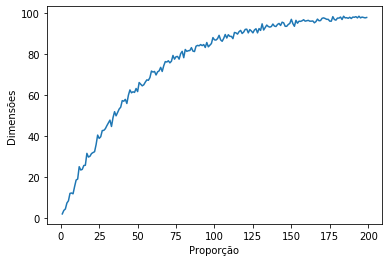

In [6]:
Ds = arange(1, 
            200
           )

plot(Ds, 
     array([corner_count(sample_(d)) for d in Ds])*100
    );

xlabel('Proporção')

ylabel('Dimensões');

####  <span style = "color:red">Código Original.</span>
<!---
Ds = arange(1, 
            200
           )

plot(Ds, 
     array([corner_count(sample_(d)) for d in Ds])*100
    );

xlabel('Proporção')

ylabel('Dimensões');
-->

#### Considerando o gráfico acima:

* O que vocês observam?
* O que acontece com a proporção de outliers à medida que o espaço de previsores aumenta em dimensionalidade?
* Qual pode ser a causa disso?

## Vamos retomar o exemplo de regressão logística

#### A seguir, vamos ver o que acontece com a performance de uma regressão logística sem regularização à medida que a quantidade de dimensões aumenta.

#### A regressão deverá prever dados simulados por meio de distribuições normais multivariadas.

* A classe 0 terá média 0 e as variâncias de todas as dimensões valerão 0,5
* A classe 1 terá média 1 e as variâncias de todas as dimensões valerão 0,5

### Regressão logística sobre dados de diferentes dimensões

#### Geramos uma lista de possíveis dimensões e para cada um desses valores geramos um conjunto de dados simulado com as características descritas acima.

#### Sobre esses dados rodamos e avaliamos uma regressão logística para cada dimensionalidade. A métrica de avaliação será a média do `score` de teste, utilizando `cross validation` com uma partição de 5 dobras em todos os casos. 

#### Para tanto, vamos importar as bibliotecas:

- [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), para realizar a valização cruzada e gerar os índices dos conjuntos de treino e teste e dividir o conjunto de dados em `k` dobras consecutivas.

- [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), avaliar a pontuação das métricas dos modelos por validação cruzada.

- [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), para criar um modelo de classificação baseado em regressão logística.

#### Vamos definir uma lista de diferentes valores de dimenões `ds` para nosso modelo, gerar um conjunto de dados de dimensões `(80, ds )`, com o auxílio dos métodos a seguir:

- [`zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html), para gerarmos uma matriz preenchida com zeros.

- [`diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html), para extrair a diagonal de uma matriz argumento.

- [`ones()`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), para gerarmos uma matriz preenchida com uns.

- [`multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html), para criarmos uma distribuição normal, multivariada.

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
score = []

# Avaliamos o modelo em todas essas dimensões
ds = [1,3,6,40,50,60,120,180]

for d in ds:

    size0 = 40; size1 = 40;
    
    loc0 = ones(d); loc1 = zeros(d)
    
    sigma0 = 0.5; sigma1 = 0.5; C0 = sigma0*diag(ones(d)); C1 = sigma1*diag(ones(d))

    #Geramos dados multivariados
    x = c_[multivariate_normal(loc0,C0,size0), zeros(size0)]
    y = c_[multivariate_normal(loc1,C1,size1), ones(size1)]
    X = r_[x, y]

    # Criamos a matriz de features
    dfX = pd.DataFrame(X)
    dfX.columns = ['dim' + str(i) for i in range(d)] + ['class']

    X = dfX.drop('class', 
                 axis = 1
                )
    y = dfX['class']
    
    # Salvamos a média do score de cross-validation
    model = LogisticRegression(C = 1e10, 
                               n_jobs = 4
                              )
    kf = KFold(5, 
               shuffle = True, 
               random_state = 0
              )
    score.append(np.mean(cross_val_score(model, 
                                         X,
                                         y, 
                                         cv = kf
                                        )
                        )
                )

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
score = []

# Avaliamos o modelo em todas essas dimensões
ds = [1,3,6,40,50,60,120,180]

for d in ds:

    size0 = 40; size1 = 40;
    
    loc0 = ones(d); loc1 = zeros(d)
    
    sigma0 = 0.5; sigma1 = 0.5; C0 = sigma0*diag(ones(d)); C1 = sigma1*diag(ones(d))

    #Geramos dados multivariados
    x = c_[multivariate_normal(loc0,C0,size0), zeros(size0)]
    y = c_[multivariate_normal(loc1,C1,size1), ones(size1)]
    X = r_[x, y]

    # Criamos a matriz de features
    dfX = pd.DataFrame(X)
    dfX.columns = ['dim' + str(i) for i in range(d)] + ['class']

    X = dfX.drop('class', 
                 axis = 1
                )
    y = dfX['class']
    
    # Salvamos a média do score de cross-validation
    model = LogisticRegression(C = 1e10, 
                               n_jobs = 4
                              )
    kf = KFold(5, 
               shuffle = True, 
               random_state = 0
              )
    score.append(np.mean(cross_val_score(model, 
                                         X,
                                         y, 
                                         cv = kf
                                        )
                        )
                )
-->

#### Observamos que a partir de certa quantidade de dimensões, a performance começa a cair muito, por causa do excesso de dimensões em relação com à quantidade de dados disponíveis. Vejamos a média do `score`, para cada uma das matrizes com `ds` dimensões.

In [8]:
score

[0.8, 0.825, 0.8875, 1.0, 1.0, 1.0, 0.9125, 0.95]

####  <span style = "color:red">Código Original.</span>
<!---
score
-->

#### A seguir plotamos a médida do `score`, para as `ds` dimensões consideradas.

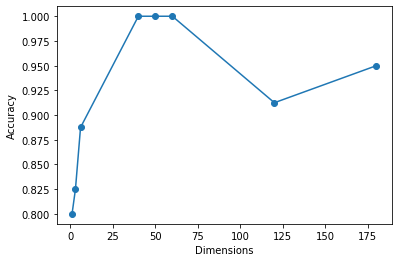

In [9]:
plt.plot(ds, 
         score,
         'o-'
        );
ylabel('Accuracy')
xlabel('Dimensions');

####  <span style = "color:red">Código Original.</span>
<!---
plt.plot(ds, 
         score,
         'o-'
        );
ylabel('Accuracy')
xlabel('Dimensions');
-->

#### Se o volume de dados aumentar, a quantidade ótima de dimensões também vai aumentar. 

#### Com o aumento de amostras, o acurácia do modelo gerado é maior para maiores quantidades de atributos. Vejamos a média do `score`, para cada uma das matrizes com `ds` dimensões.

In [10]:
score = []
# Avaliamos o modelo em todas essas dimensões
ds = [1,3,6,40,50,60,120,180]

for d in ds:

    size0 = 4000; size1 = 4000;
    
    loc0 = ones(d); loc1 = zeros(d)
    
    sigma0 = 0.5; sigma1 = 0.5; C0 = sigma0*diag(ones(d)); C1 = sigma1*diag(ones(d))

    #Geramos dados multivariados
    x = c_[multivariate_normal(loc0, 
                               C0, 
                               size0), 
           zeros(size0)
          ]
    
    y = c_[multivariate_normal(loc1, 
                               C1, 
                               size1
                              ), 
           ones(size1)
          ]
    X = r_[x, 
           y
          ]

    # Criamos a matriz de features
    dfX = pd.DataFrame(X)
    dfX.columns = ['dim' + str(i) for i in range(d)] + ['class']
    X = dfX.drop('class', 
                 axis = 1
                )
    
    y = dfX['class']
    
    # Salvamos a média do score de cross-validation
    model = LogisticRegression(C = 1e10, 
                               n_jobs = 4
                              )
    
    kf = KFold(5, 
               shuffle = True, 
               random_state = 0
              )
    
    score.append(np.mean(cross_val_score(model, 
                                         X,
                                         y, cv = kf
                                        )
                        )
                )

####  <span style = "color:red">Código Original.</span>
<!---
score = []
# Avaliamos o modelo em todas essas dimensões
ds = [1,3,6,40,50,60,120,180]

for d in ds:

    size0 = 4000; size1 = 4000;
    
    loc0 = ones(d); loc1 = zeros(d)
    
    sigma0 = 0.5; sigma1 = 0.5; C0 = sigma0*diag(ones(d)); C1 = sigma1*diag(ones(d))

    #Geramos dados multivariados
    x = c_[multivariate_normal(loc0, 
                               C0, 
                               size0), 
           zeros(size0)
          ]
    
    y = c_[multivariate_normal(loc1, 
                               C1, 
                               size1
                              ), 
           ones(size1)
          ]
    X = r_[x, 
           y
          ]

    # Criamos a matriz de features
    dfX = pd.DataFrame(X)
    dfX.columns = ['dim' + str(i) for i in range(d)] + ['class']
    X = dfX.drop('class', 
                 axis = 1
                )
    
    y = dfX['class']
    
    # Salvamos a média do score de cross-validation
    model = LogisticRegression(C = 1e10, 
                               n_jobs = 4
                              )
    
    kf = KFold(5, 
               shuffle = True, 
               random_state = 0
              )
    
    score.append(np.mean(cross_val_score(model, 
                                         X,
                                         y, cv = kf
                                        )
                        )
                )
-->

#### Plotamos novamente a médida do `score`, para as `ds` dimensões consideradas.

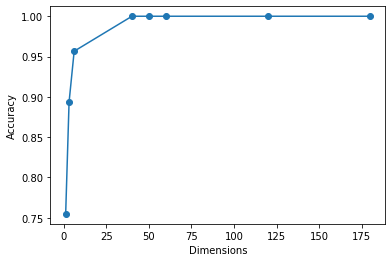

In [11]:
plt.plot(ds,
         score,
         'o-'
        );

ylabel('Accuracy')

xlabel('Dimensions');

####  <span style = "color:red">Código Original.</span>
<!---
plt.plot(ds,
         score,
         'o-'
        );

ylabel('Accuracy')

xlabel('Dimensions');
-->